In [9]:
pip install kagglehub

     -------------------------------------- 63.4/63.4 kB 681.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("protobioengineering/mit-bih-arrhythmia-database-modern-2023")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 235M/235M [04:34<00:00, 898kB/s]

Extracting files...


Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\2


In [2]:
import os

# Show what's inside the downloaded folder
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

C:\Users\LENOVO\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\2\100.csv
C:\Users\LENOVO\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\2\101.csv
C:\Users\LENOVO\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\2\102.csv
C:\Users\LENOVO\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\2\103.csv
C:\Users\LENOVO\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\2\104.csv
C:\Users\LENOVO\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\2\105.csv
C:\Users\LENOVO\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\2\106.csv
C:\Users\LENOVO\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\2\107.csv
C:\Users\LENOVO\.cache\kagglehub

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Path to your downloaded dataset
DATA_PATH = r"C:\Users\LENOVO\.cache\kagglehub\datasets\protobioengineering\mit-bih-arrhythmia-database-modern-2023\versions\2"

In [6]:
def bandpass_filter(signal, lowcut=0.5, highcut=45.0, fs=360, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

def normalize_signal(signal):
    return (signal - np.mean(signal)) / np.std(signal)

In [9]:
def load_preprocess_csv(record_id, fs=360):
    filepath = os.path.join(DATA_PATH, f"{record_id}.csv")
    
    # Read and force numeric values only
    df = pd.read_csv(filepath, header=None, dtype=str)  # Read as string first
    df = df.apply(pd.to_numeric, errors='coerce')       # Convert to numeric, set invalid to NaN
    
    # Drop rows/columns that are entirely NaN
    df.dropna(axis=1, how='all', inplace=True)
    df.dropna(axis=0, how='any', inplace=True)  # Remove rows with NaN (optional, based on data quality)

    # Use first available column as ECG signal
    signal = df.iloc[:, 0].values

    # Preprocess
    filtered = bandpass_filter(signal, fs=fs)
    normalized = normalize_signal(filtered)

    return normalized

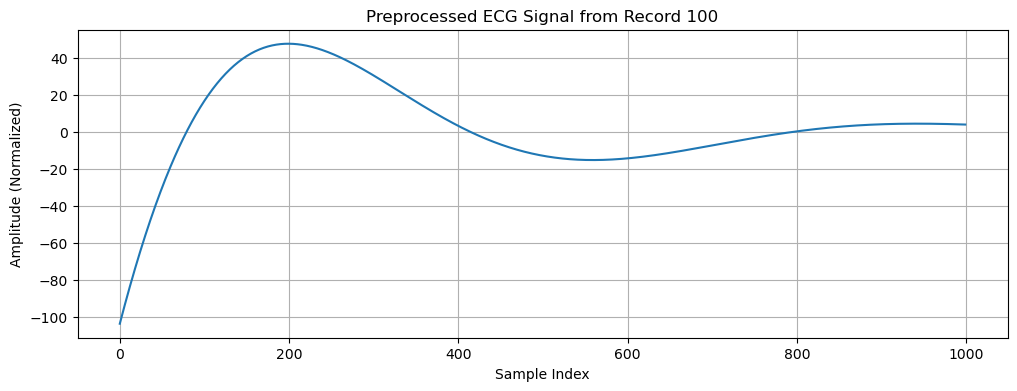

In [10]:
record = "100"
ecg = load_preprocess_csv(record)

plt.figure(figsize=(12, 4))
plt.plot(ecg[:1000])
plt.title(f"Preprocessed ECG Signal from Record {record}")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude (Normalized)")
plt.grid(True)
plt.show()

In [11]:
processed_data = {}

for file in os.listdir(DATA_PATH):
    if file.endswith(".csv"):
        rec_id = file.replace(".csv", "")
        try:
            ecg = load_preprocess_csv(rec_id)
            processed_data[rec_id] = ecg
            print(f"✅ {rec_id} processed")
        except Exception as e:
            print(f"❌ {rec_id} failed: {e}")

✅ 100 processed
✅ 101 processed
✅ 102 processed
✅ 103 processed
✅ 104 processed
✅ 105 processed
✅ 106 processed
✅ 107 processed
✅ 108 processed
✅ 109 processed
✅ 111 processed
✅ 112 processed
✅ 113 processed
✅ 114 processed
✅ 115 processed
✅ 116 processed
✅ 117 processed
✅ 118 processed
✅ 119 processed
✅ 121 processed
✅ 122 processed
✅ 123 processed
✅ 124 processed
✅ 200 processed
✅ 201 processed
✅ 202 processed
✅ 203 processed
✅ 205 processed
✅ 207 processed
✅ 208 processed
✅ 209 processed
✅ 210 processed
✅ 212 processed
✅ 213 processed
✅ 214 processed
✅ 215 processed
✅ 217 processed
✅ 219 processed
✅ 220 processed
✅ 221 processed
✅ 222 processed
✅ 223 processed
✅ 228 processed
✅ 230 processed
✅ 231 processed
✅ 232 processed
✅ 233 processed
✅ 234 processed
